In [6]:
import pandas as pd

In [7]:
from google.colab import files
uploaded=files.upload()

Saving gender_classification_v7.csv to gender_classification_v7.csv


In [8]:
data=pd.read_csv("gender_classification_v7.csv");

In [9]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [11]:
data_num=data.drop(['gender'],axis=1)
data_cat=data.select_dtypes(object)

In [12]:
data_num.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [13]:
data_cat.head()

,gender
0,Male
1,Female
2,Male
3,Male
4,Female


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder();

for col in data_cat.columns:
  data_cat[col]=le.fit_transform(data[col])

In [15]:
data_cat.head()

,gender
0,1
1,0
2,1
3,1
4,0


In [16]:
data_new=pd.concat([data_num,data_cat],axis=1)

In [17]:
data_new.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [19]:
X=data_new.drop(['gender'],axis=1)
y=data_new.gender

In [20]:
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [21]:
y.head()

,gender
0,1
1,0
2,1
3,1
4,0


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
X_train.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
805,1,13.2,5.9,1,0,0,0
1110,1,15.4,5.2,1,1,1,0
1356,1,13.4,5.4,0,0,0,0
565,0,11.6,5.2,1,1,1,0
363,1,13.4,6.4,0,0,0,0


In [24]:
y_train.head()

,gender
805,0
1110,1
1356,0
565,1
363,0


In [27]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [28]:
log.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred=log.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[469,  22],
       [ 13, 497]])

<Axes: >

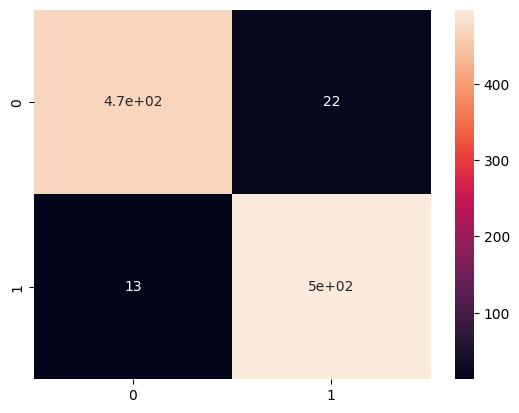

In [34]:
import seaborn as sns
sns.heatmap(cm,annot=True,color=('red','green','blue'))